In [25]:
import pandas
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers=pandas.read_csv(r'datasets/Mall_Customers.csv')
customers

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,NaN
197,198,Male,32,126.0,74.0
198,199,Male,32,137.0,18.0


In [11]:
customers['Gender'].fillna('Unknown',inplace=True)
mean_annual_income=customers['Annual Income'].mean()
mean_spending_score=customers['Spending Score'].mean()
customers['Annual Income'].fillna(mean_annual_income,inplace=True)
customers['Spending Score'].fillna(mean_spending_score,inplace=True)


/tmp/ipykernel_3909/3065192162.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['Annual Income'].fillna(mean_annual_income,inplace=True)
/tmp/ipykernel_3909/3065192162.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [12]:
customers.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [16]:
def convert(x):
    ans=130.50*x
    return ans

customers['Annual Income']=customers['Annual Income'].apply(convert)
customers['Spending Score']=customers['Spending Score'].apply(convert)
customers.head(5)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,1957.5,5089.5
1,2,Male,21,1957.5,10570.5
2,3,Female,20,2088.0,783.0
3,4,Female,23,2088.0,10048.5
4,5,Female,31,2218.5,5220.0


In [17]:
#clustering(we are training the data model not testing
#we will be using k-Means when clustering
#arrange our dataset in form of an array

array=customers.values
array

array([[1, 'Male', 19, 1957.5, 5089.5],
       [2, 'Male', 21, 1957.5, 10570.5],
       [3, 'Female', 20, 2088.0, 783.0],
       [4, 'Female', 23, 2088.0, 10048.5],
       [5, 'Female', 31, 2218.5, 5220.0],
       [6, 'Female', 22, 2218.5, 9918.0],
       [7, 'Female', 35, 2349.0, 783.0],
       [8, 'Female', 23, 2349.0, 12267.0],
       [9, 'Male', 64, 2479.5, 391.5],
       [10, 'Female', 30, 2479.5, 9396.0],
       [11, 'Male', 67, 2479.5, 1827.0],
       [12, 'Female', 35, 2479.5, 12919.5],
       [13, 'Female', 58, 2610.0, 1957.5],
       [14, 'Female', 24, 2610.0, 10048.5],
       [15, 'Male', 37, 2610.0, 1696.5],
       [16, 'Male', 22, 2610.0, 10309.5],
       [17, 'Female', 35, 2740.5, 4567.5],
       [18, 'Male', 20, 2740.5, 8613.0],
       [19, 'Male', 52, 3001.5, 3784.5],
       [20, 'Female', 35, 3001.5, 12789.0],
       [21, 'Male', 35, 3132.0, 4567.5],
       [22, 'Male', 25, 3132.0, 9526.5],
       [23, 'Female', 46, 3262.5, 652.5],
       [24, 'Male', 31, 3262.5, 9526.

In [19]:
#start with the row:column
x=array[0:200,2:5]
x

array([[19, 1957.5, 5089.5],
       [21, 1957.5, 10570.5],
       [20, 2088.0, 783.0],
       [23, 2088.0, 10048.5],
       [31, 2218.5, 5220.0],
       [22, 2218.5, 9918.0],
       [35, 2349.0, 783.0],
       [23, 2349.0, 12267.0],
       [64, 2479.5, 391.5],
       [30, 2479.5, 9396.0],
       [67, 2479.5, 1827.0],
       [35, 2479.5, 12919.5],
       [58, 2610.0, 1957.5],
       [24, 2610.0, 10048.5],
       [37, 2610.0, 1696.5],
       [22, 2610.0, 10309.5],
       [35, 2740.5, 4567.5],
       [20, 2740.5, 8613.0],
       [52, 3001.5, 3784.5],
       [35, 3001.5, 12789.0],
       [35, 3132.0, 4567.5],
       [25, 3132.0, 9526.5],
       [46, 3262.5, 652.5],
       [31, 3262.5, 9526.5],
       [54, 3654.0, 1827.0],
       [29, 3654.0, 10701.0],
       [45, 3654.0, 4176.0],
       [35, 3654.0, 7960.5],
       [40, 3784.5, 4045.5],
       [23, 3784.5, 11353.5],
       [60, 3915.0, 522.0],
       [21, 3915.0, 9526.5],
       [53, 4306.5, 522.0],
       [18, 4306.5, 12006.0],
       [49

In [20]:
#splitting into clusters/sets/groups
from sklearn.cluster import KMeans as km
model=km(n_clusters=12,random_state=42)
model.fit(x)

KMeans(n_clusters=12, random_state=42)

In [21]:
groups=model.cluster_centers_
groups

array([[   44.52380952,  6195.64285714,  6664.82142857],
       [   32.41176471, 10785.44117647, 11806.41176471],
       [   25.33333333,  3274.92857143, 10446.21428571],
       [   45.38461538, 12196.73076923,  2790.69230769],
       [   48.75      ,  3208.125     ,  1250.625     ],
       [   32.78571429, 10151.03571429,  9563.78571429],
       [   37.66666667, 10005.        ,  1313.7       ],
       [   35.125     , 15350.0625    ,  9488.16148477],
       [   38.44444444,  9526.5       ,  4963.7106599 ],
       [   39.5       , 16769.25      ,  2218.5       ],
       [   41.36363636,  3677.72727273,  4342.09090909],
       [   40.47222222,  8088.66834171,  6550.375     ]])

In [23]:
#lets create a table for our groups
clusters=pandas.DataFrame(groups,columns=['Age','Annual Income','Spending Score'])
clusters

,Age,Annual Income,Spending Score
0,44.523810,6195.642857,6664.821429
1,32.411765,10785.441176,11806.411765
2,25.333333,3274.928571,10446.214286
3,45.384615,12196.730769,2790.692308
4,48.750000,3208.125000,1250.625000
5,32.785714,10151.035714,9563.785714
6,37.666667,10005.000000,1313.700000
7,35.125000,15350.062500,9488.161485
8,38.444444,9526.500000,4963.710660
9,39.500000,16769.250000,2218.500000


In [24]:
customers['group_number']=model.labels_
customers.head(10)
#The more the clusters the more the accuracy

,CustomerID,Gender,Age,Annual Income,Spending Score,group_number
0,1,Male,19,1957.5,5089.5,10
1,2,Male,21,1957.5,10570.5,2
2,3,Female,20,2088.0,783.0,4
3,4,Female,23,2088.0,10048.5,2
4,5,Female,31,2218.5,5220.0,10
5,6,Female,22,2218.5,9918.0,2
6,7,Female,35,2349.0,783.0,4
7,8,Female,23,2349.0,12267.0,2
8,9,Male,64,2479.5,391.5,4
9,10,Female,30,2479.5,9396.0,2


<Axes: xlabel='group_number', ylabel='count'>

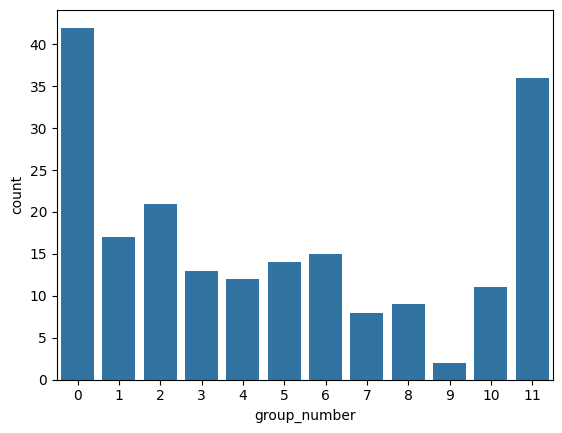

In [26]:
sns.countplot(x=customers['group_number'])

/tmp/ipykernel_3909/4106897911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Gender',y='group_number',palette='magma',data=customers)


<Axes: xlabel='Gender', ylabel='group_number'>

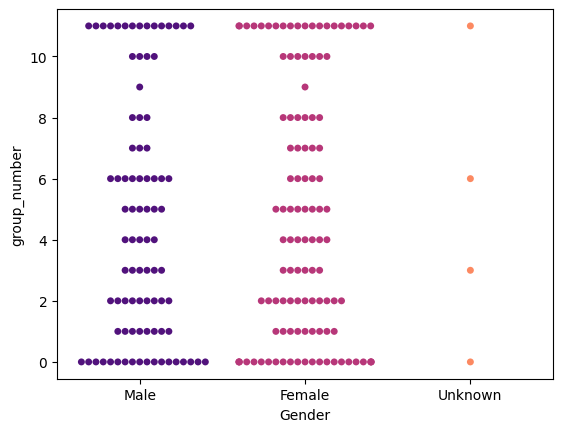

In [28]:
sns.swarmplot(x='Gender',y='group_number',palette='magma',data=customers)

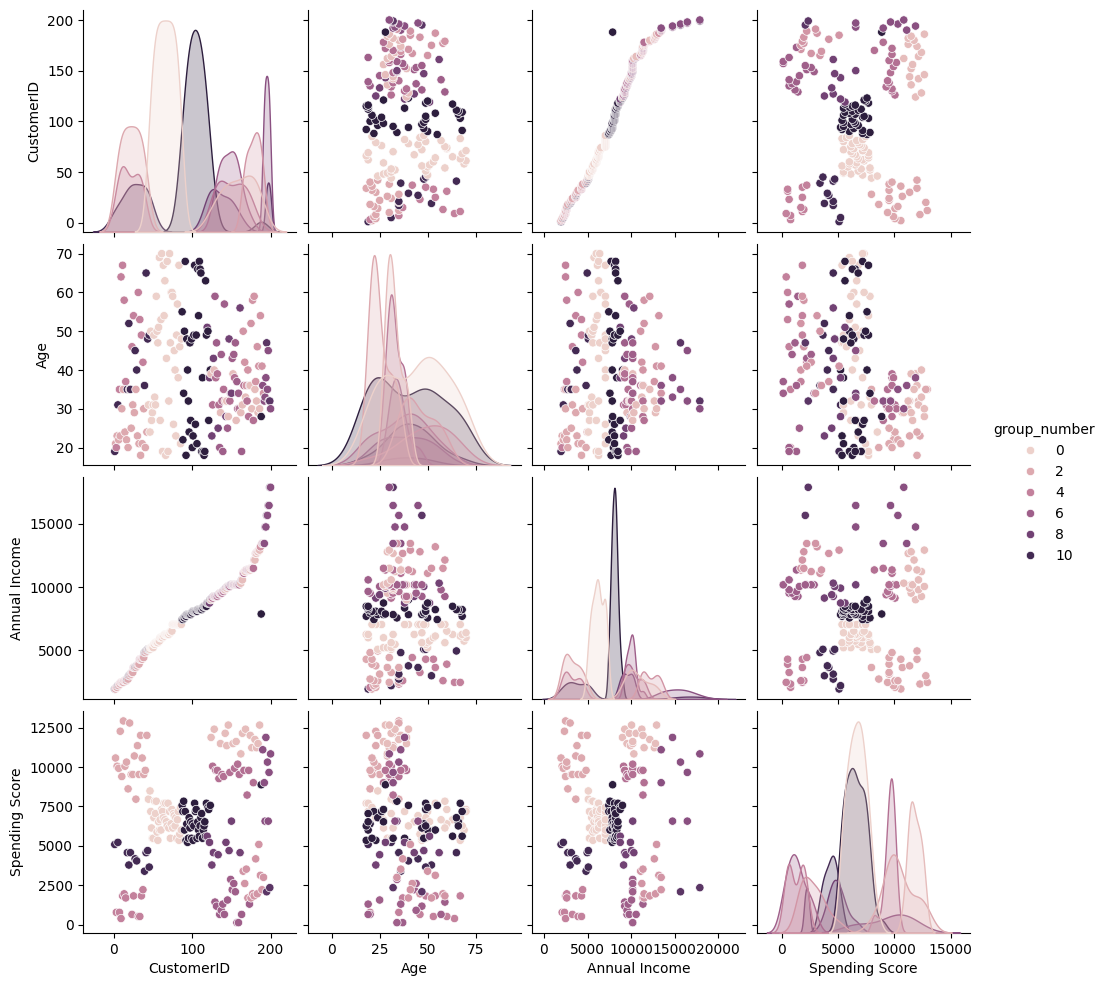

In [29]:
sns.pairplot(data=customers,hue='group_number')